#  2. Ensemble

1. 앙상블이란

여러 개의 알고리즘을 결합하여 보다 정확한 예측을 도출

하나의 강한 예측기보다는 복수의 약한 예측기 (Weak learner)의 결합이 강하다는 생각에 기반을 둠 (집단지성)

비정형 데이터보다는 정형 데이터 분석에서 성과를 보임

2. 유형

 - Voting
 - Bagging : Random Forest
 - Boosting
 - Stacking 등
 
3. 앙상블의 목표  
여러 모델들을 활용한 예측 시, 모델 예측의 편향 및 분산을 줄이는 것을 목표로 함. 

In [1]:
# 기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
import statsmodels.api as sm
import scipy
import pickle

In [2]:
# matplotlib 사용 시 한글 깨짐 문제 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
# 경고 메시지 비활성화
import warnings

warnings.filterwarnings("ignore")

In [4]:
# 경로 확인
path = os.getcwd()
print(path)

C:\Users\lsc\Desktop\ADP





## 2-1. Voting Classifier

1. Hard Voting (다수결 원칙)  

2. Soft Voting (클래스 결정 확률 예측치 평균으로 최종 값 예측)
 - 서로 다른 종류의 모델들을 결합함.
 - 일반적으로 Soft Voting 성능이 더 좋음.  
 - Soft Voting의 경우 모델의 가중치에 변화를 줄 수 있음.

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
cancer = load_breast_cancer()

In [7]:
df_x = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_x.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [8]:
df_y = pd.DataFrame(cancer.target, columns = ['class'])
df_y.head(10)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
print("df_x 결측치 없음 ; ", df_x.isnull().sum().sum())
print("df_y 결측치 없음 ; ", df_y.isnull().sum().sum())

df_x 결측치 없음 ;  0
df_y 결측치 없음 ;  0


In [12]:
df_x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df_y.value_counts()
  # Description(DESCR)에 따르면 Class 0는 Malignant(악성), Class 1은 Benign(양성)임.

class
1        357
0        212
dtype: int64

In [14]:
# 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 156)

In [15]:
# Voting 적용 모델 1 : Logistic Regression
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 8)

# Soft Voting 기반의 Ensemble
voting = VotingClassifier(estimators = [('LogisiticRegression', logreg), ('KNN', knn)], voting = 'soft')

In [16]:
# 앙상블 모델 성능 평가
voting.fit(x_train, y_train)
pred = voting.predict(x_test)
print('Accuracy of Voting Classifier : {0: .4f}'.format(accuracy_score(y_test, pred)))

Accuracy of Voting Classifier :  0.9474


In [17]:
# 개별 모델 성능 평가
models = [logreg, knn]

for model in models :
  model.fit(x_train, y_train)

  pred = model.predict(x_test)

  class_name = model.__class__.__name__

  print('Accuracy of ', class_name, ' : {0: .4f}'.format(accuracy_score(y_test, pred)))

Accuracy of  LogisticRegression  :  0.9386
Accuracy of  KNeighborsClassifier  :  0.9386


## 2-2. Bagging (Boostrap Aggregating)

### 2-2-1. Bootstrap

표본으로부터 반복복원추출하는 방법으로 Resampling(재표집)하여 계산한 표본통계량을 기반으로 모수의 분포를 추정한다.

 - 본래의 모집단이 iid assumption (Independent and Identical Distribution)을 충족해야 한다.
 - Resampling 횟수가 적을 경우 Outlier의 영향을 받을 수 있다.
 - 정규성 가정이 필요하지 않다.

In [18]:
pop_list = np.random.randint(1, 100, size = 10000)

print("모집단 평균 : ", np.mean(pop_list))
print("모집단 표준편차 : ", np.std(pop_list))

모집단 평균 :  50.2698
모집단 표준편차 :  28.786681086224583


In [19]:
pop_list_array = np.array(pop_list, int)

In [20]:
# scipy를 이용한 Bootstrapping
import scipy.stats as stats

result = stats.bootstrap((pop_list_array, ), np.std, confidence_level = 0.95)
print(result.bootstrap_distribution.mean() - np.std(pop_list))

-0.0010462667640176448


In [21]:
def sampling_hj(lst) : 
    sample_idx = np.random.permutation(len(lst))
    sample_idx = sample_idx[ : int(round(len(lst) * 0.01, 0))]
    sample_list = [lst[idx] for idx in sample_idx]
    
    return sample_list

def bootstrap_hj(lst, repetition_size) :
    
    sample_std_list = []
    
    for i in range(repetition_size) : 
        sample_list = sampling_hj(lst)
        
        sample_std_list.append(np.std(sample_list))
    
    print(repetition_size, "회 반복 :", np.mean(sample_std_list))
    
    return np.mean(sample_std_list)


for i in [100, 500, 1000, 5000] :
    result = bootstrap_hj(pop_list, i)
    
    print(i, "회 실시 시 모집단과의 차이 : ", np.abs(np.std(pop_list) - result))
    print('\n')

100 회 반복 : 28.73642105317586
100 회 실시 시 모집단과의 차이 :  0.05026003304872262


500 회 반복 : 28.5896016423374
500 회 실시 시 모집단과의 차이 :  0.19707944388718346


1000 회 반복 : 28.585695150662488
1000 회 실시 시 모집단과의 차이 :  0.20098593556209465


5000 회 반복 : 28.6229174401168
5000 회 실시 시 모집단과의 차이 :  0.16376364610778182




### 2-2-2. Out-of-Bag

Bootstrap의 복원추출으로 뽑히지 않은 데이터들을 활용하여 모델의 성능을 측정한다.

보통 전체 데이터의 $ 2 \over 3 $ (약 63% 가량) 정도가 추출된다고 하며, 나머지 추출되지 않은  $ 1 \over 3 $ 가량의 관측치들을 $ OOB \; Observation $이라 하며, Validation Set처럼 취급한다.


Ex) Bootstrap 실행횟수 : $ B = 9 $

Observation $ x_i $가 추출에서 제외된 개별 모델들 (전체 $ B $ 개 중 약 $ \frac{B}{3}개 $)의 $ x_i $에 대한 예측치의 평균을 내어 OOB MSE나 Classification Error를 구하여 성능 측정을 함으로써 Cross Validation을 대체할 수 있다. (단, Cross Validation이 보통 더 낫다고 한다.)

[참고] Out-of-Bag 실행 시 평균 샘플링 비율 산출

$m $개의 Sample에서 무작위하게 한 개만 추출할 때, sample $ x_i $가 추출되거나 추출에서 제외될 확률은 다음과 같다.

$$ P(sample \; x_i \; is \; selected) = \frac{1}{m} $$

$$ P(sample \; x_i \; is \; not \; selected) = 1 - \frac{1}{m} $$

무작위 복원 추출을 $ m $번 진행할 시, $m$회 모두 선택되지 않을 확률은

$$ P(sample \; x_i \; is \; not \; selected \; for \; m \; times) = (1 - \frac{1}{m})^m $$

로피탈의 정리를 이용하여 확률을 계산해보자.

$$ \lim_{m \leftarrow \infty}(1 - \frac{1}{m})^m = y $$

$$ \ln y = \lim_{m \leftarrow \infty} m \ln \; (1 - \frac{1}{m}) = \lim_{x \leftarrow 0} \frac{\ln \; (1 - x)}{x} $$

$$ = \lim_{x \leftarrow 0} \frac{\frac{d}{dx} \ln \; (1 - x)}{\frac{d}{dx} x} = \lim_{x \leftarrow 0} \frac{- 1}{1 - x} = -1$$

$$ y = e^{-1} = 0.3678... $$

$$ 1 - y = 1 - e^{-1} \approx 0.63212 $$

$ \therefore $ Sample $ x_i $가 최소 1회 이상 추출될 확률은 약 36.8%이다.

### 2-2-3. Random Forest

Bootstrap을 활용하여 개별 트리 모델 생성. 
이 때, Pruning (가지치기)을 하지 않는다.
High Variance 문제점이 있던 Deicision Tree를 Bootstrap으로 B개 생성하여 최종적으로 평균을 냄으로써 Variance를 줄여준다.

다만, 유사한 Training Set을 사용하였기 때문에 개별 모델 간 독립성이 보장되지 않는다. 

이를 극복하기 위하여 Random Forest는 Feature Selection 과정을 거쳐 모델 간 Correlation을 낮추어 성능을 개선하였다. 

In [24]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

iris = load_iris()

In [25]:
iris_x = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_y = pd.DataFrame(iris.target, columns = ["species"])

In [26]:
for i in iris_y['species'].unique() :
    iris_y['species'].replace(i, iris.target_names[i], inplace = True)

In [27]:
from sklearn.model_selection import train_test_split

iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_x, iris_y, test_size = 0.25, stratify = iris.target, random_state = 123)

#### 2-2-3-1. Random Forest Classifier

In [28]:
rfc = RandomForestClassifier(n_estimators = 500
                                 # n_estimators : Tree의 수 (OR Bootstrap 반복 횟수)
                            , criterion = 'entropy'
                            , max_depth = 3
                            , max_features = 'sqrt'
                                 # max_features : Best Split을 위한 Feature 갯수. 'sqrt'이면 sqrt(n_features)이다.
                            , bootstrap = True
                            , max_samples = 1.0
                                # max_samples : 'bootstrap = True'일 때의 resampling size (int이면 개수, float이면 비율)
                            , oob_score = True
                                # oob_score : 
                            , random_state = 123
                            )

In [29]:
rfc.fit(iris_x_train, iris_y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_samples=1.0,
                       n_estimators=500, oob_score=True, random_state=123)

In [30]:
iris_y_pred = rfc.predict(iris_x_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(iris_y_test, iris_y_pred)

print(f"Out-of-Bag Score Estimate : {rfc.oob_score_ : .3}")
print(f"Mean Accuracy Score : {accuracy : .3}")

Out-of-Bag Score Estimate :  0.964
Mean Accuracy Score :  0.974


OOB Score과 Accuracy는 높게 나오나,  
모든 Class를 고르게 잘 분류하는지 확인해볼 필요가 있다.

<Axes: >

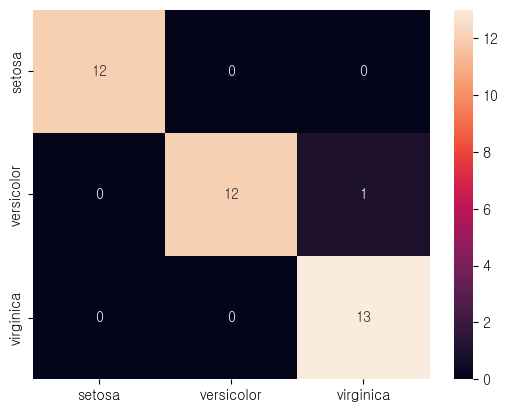

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = pd.DataFrame(confusion_matrix(iris_y_test, iris_y_pred), index = iris.target_names, columns = iris.target_names)
sns.heatmap(cm, annot = True)

#### 2-2-3-2. Random Forest Regressor

In [33]:
boston = pd.read_csv("./boston_housing.csv", engine = 'python')

In [34]:
boston.drop(['CAT. MEDV'], axis = 1, inplace = True)

In [35]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [50]:
boston_x = boston.drop('MEDV', axis = 1)
boston_y = boston['MEDV']

In [52]:
boston_x_train, boston_x_test, boston_y_train, boston_y_test = train_test_split(boston_x, boston_y, test_size = 0.3)

In [53]:
rfr = RandomForestRegressor(n_estimators = 100
                           , criterion = 'squared_error'
                           , max_depth = 4
                           , max_features = 0.3
                           , max_samples = 1.0
                           , bootstrap = True
                           , oob_score = True
                           , random_state = 100)

rfr.fit(boston_x_train, boston_y_train)

RandomForestRegressor(max_depth=4, max_features=0.3, max_samples=1.0,
                      oob_score=True, random_state=100)

In [60]:
boston_pred = rfr.predict(boston_x_test)

print('Out-of-Bag : ', round(rfr.oob_score_, 3))

Out-of-Bag :  0.786


## 2-3. Boosting  

$$ H(x) = sign\{\sum_{m = 1}^M a_m h_m(x)\} $$

## 2-4. Stacking

## 2-5. 의문점 : Ensemble은 항상 정답일까?

앙상블 기법의 전제 : 개별 모델 예측의 Bias (편향) & Variance (분산)를 줄여, 성능을 향상시킨다.

→ 만약 예측 성능이 향상되지 않았다면, 다음 두 가지 경우로 나누어 볼 수 있다.

① 개별 모델 예측 결과의 편향, 분산 차이가 유의미하지 않은 경우

 - 앙상블 적용 전후 예측 결과의 편향 및 분산 차이가 크려면 모델들의 상관관계가 낮아야 한다. → 모델 간 Correlation이 낮은 조합으로 구성해야 함

② 앙상블 후 편향과 분산이 줄었으나, 성능 향상으로 이어지지 않은 경우

 - 개별 모델 성능 기준 조합이 좋은 결과를 담보하지는 않는다.
 - 중간 정도의 성능을 내는 모델들의 조합도 고려할 것.

### 2-5-1. 그렇다면 조합을 어떻게 구성해야 할까?

#### Rule 1. Base Learner의 정확도

[Assumption]  Binary Classification (Binomial Distribution)

$$ P(Correct) = p $$
$$ Number \; of \; Correctly \; Classifying \;Learner = k $$

앙상블 모델의 정확도(이항분포 기댓값)는 다음과 같다.

$$ P_{emsemble}(K;L, p) = {L \choose K} p^k (1-p)^{(L-K)} $$

Case 1. $ p $ 가 $ \frac{1}{2} $ 이하면서 $ L $ 이 증가하면 앙상블 모델의 예측 정확도가 하락한다.

Case 2. $ p $ 가 $ \frac{1}{2} $ 이상이고 $ L $ 이 증가하면 앙상블 모델의 예측 정확도가 상승한다.

→ 앙상블 모델에 쓰일 Base Learner의 정확도는 최소 0.5 이상이어야 한다.

#### Rule 2. Base Learner 간의 상관성 (Correlation)


$$ Var(X + Y) = Var(X) + Var(Y) + 2 Cov(X, Y) $$

$$ X, Y : Base \; Learner $$ 
$$ X + Y : Ensemble \; of \; Base \; Learner \; X \; and \; Y $$

만약 X와 Y가 독립이 아니라면 공분산 $ Cov(X, Y) > 0 $ 이 되어 앙상블의 분산이 증가하여 성능이 오히려 하락할 수 있다.

→ 앙상블 모델에 쓰일 Base Learner들은 각각 독립이어야 한다.


[참고] Base Learner의 수를 확장하였을 때의 수식

$$ Var \, (\frac{Z_1 + ... + Z_n}{n}) = \frac{1}{n^2}{Var(Z_1) + Var(Z_2) + ... + \sum \sum Cov(Z_i, Z_j)} $$

$$ = \frac{1}{n^2}{n\sigma^2 + \sum \sum Cov(Z_i, Z_j)} $$

$$ = \frac{\sigma^2}{n} + \frac{1}{n^2} {\sum \sum Cov(Z_i, Z_j)}$$


$$ Z_i : Base \; Learner (i = 1, 2, ... , n) $$ 
$$ \sum_{i = 1} {Z_i} : Ensemble \; of \; Base \; Learner \; X \; and \; Y $$

#### Rule 3. Base Learner의 수

이론적으로 무한대의 Base Learner를 결합시킬 수 있음.  
그러나, Computation Cost 등의 현실적 한계로 인하여 실제로는 불가하다.

중심극한정리에 따라 Base Learner가 최소 30개 이상이면 좋은 성능을 낼 가능성이 있다고 판단할 수 있다.

참고

https://velog.io/@jaylnne/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%95%99%EC%83%81%EB%B8%94-Ensemble-%EC%9D%80-%ED%95%AD%EC%83%81-%EB%AA%A8%EB%8D%B8%EC%9D%98-%EC%84%B1%EB%8A%A5%EC%9D%84-%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%AC%EA%B9%8C  

https://todayisbetterthanyesterday.tistory.com/47